In [11]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from feature_engine.datetime import *

In [60]:
def getData(stockName,period='60d',interval='15m'):
    return yf.download(tickers=stockName, period=period, interval=interval)

In [73]:
df=getData('THYAO.IS').reset_index()

[*********************100%***********************]  1 of 1 completed


In [74]:
df['pct']=df['Close'].pct_change()
df['label']=np.where(df['pct']>0.002,1,0)

In [75]:
df

,Datetime,Open,High,Low,Close,Adj Close,Volume,pct,label
0,2023-03-16 09:45:00,132.000000,132.000000,132.000000,132.000000,132.000000,0,NaN,0
1,2023-03-16 10:00:00,132.100006,133.399994,131.600006,132.899994,132.899994,3865143,0.006818,1
2,2023-03-16 10:15:00,132.899994,133.000000,132.100006,132.500000,132.500000,898802,-0.003010,0
3,2023-03-16 10:30:00,132.500000,133.100006,132.399994,132.899994,132.899994,537124,0.003019,1
4,2023-03-16 10:45:00,133.000000,133.199997,132.800003,133.199997,133.199997,947293,0.002257,1
...,...,...,...,...,...,...,...,...,...
1948,2023-06-12 15:45:00,183.399994,183.899994,182.300003,183.300003,183.300003,1845608,0.000000,0
1949,2023-06-12 16:00:00,183.300003,183.600006,182.100006,183.199997,183.199997,1497008,-0.000546,0
1950,2023-06-12 16:15:00,183.199997,183.699997,183.000000,183.199997,183.199997,633394,0.000000,0
1951,2023-06-12 16:30:00,183.100006,183.600006,182.899994,183.199997,183.199997,542392,0.000000,0


In [76]:
dt_fe=["day_of_week","hour","minute"]
dtf=DatetimeFeatures(features_to_extract=dt_fe)
df=dtf.fit_transform(df)

In [77]:
df

,Open,High,Low,Close,Adj Close,Volume,pct,label,Datetime_day_of_week,Datetime_hour,Datetime_minute
0,132.000000,132.000000,132.000000,132.000000,132.000000,0,NaN,0,3,9,45
1,132.100006,133.399994,131.600006,132.899994,132.899994,3865143,0.006818,1,3,10,0
2,132.899994,133.000000,132.100006,132.500000,132.500000,898802,-0.003010,0,3,10,15
3,132.500000,133.100006,132.399994,132.899994,132.899994,537124,0.003019,1,3,10,30
4,133.000000,133.199997,132.800003,133.199997,133.199997,947293,0.002257,1,3,10,45
...,...,...,...,...,...,...,...,...,...,...,...
1948,183.399994,183.899994,182.300003,183.300003,183.300003,1845608,0.000000,0,0,15,45
1949,183.300003,183.600006,182.100006,183.199997,183.199997,1497008,-0.000546,0,0,16,0
1950,183.199997,183.699997,183.000000,183.199997,183.199997,633394,0.000000,0,0,16,15
1951,183.100006,183.600006,182.899994,183.199997,183.199997,542392,0.000000,0,0,16,30


<Axes: xlabel='Datetime_day_of_week'>

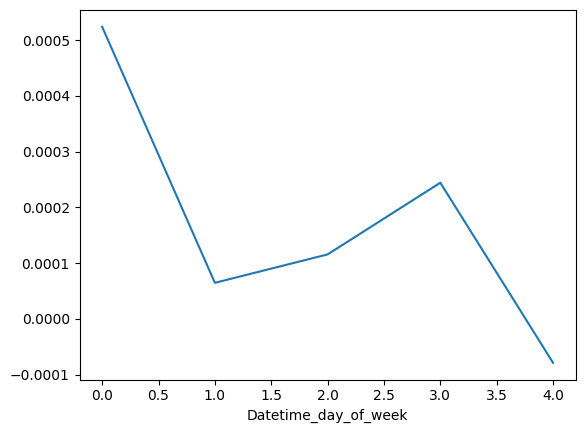

In [78]:
df.groupby('Datetime_day_of_week')['pct'].mean().plot()

<Axes: xlabel='Datetime_hour'>

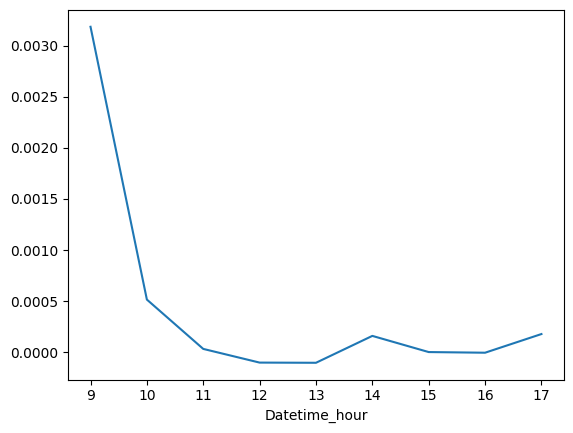

In [79]:
df.groupby('Datetime_hour')['pct'].mean().plot()

<Axes: xlabel='Datetime_minute'>

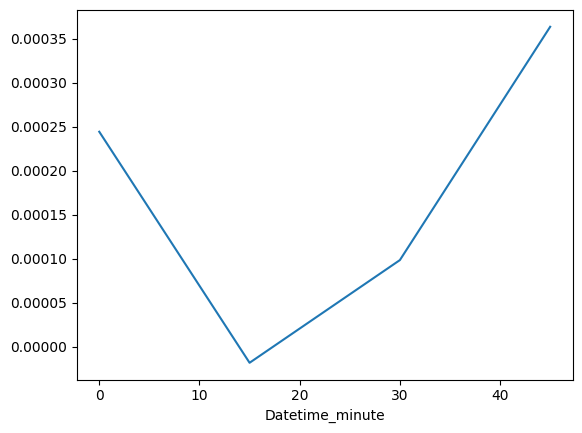

In [80]:
df.groupby('Datetime_minute')['pct'].mean().plot()

<Axes: xlabel='Datetime_minute'>

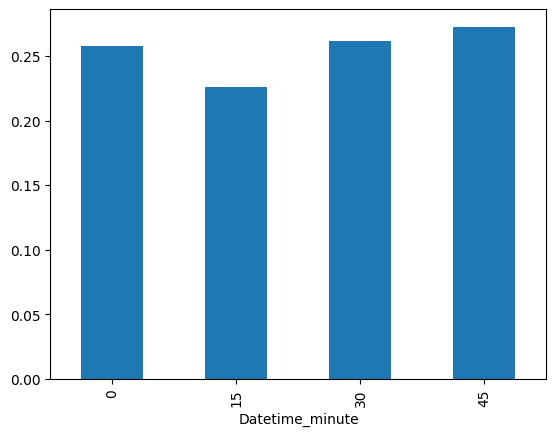

In [81]:
df.groupby('Datetime_minute')['label'].mean().plot(kind='bar')

<Axes: xlabel='label', ylabel='count'>

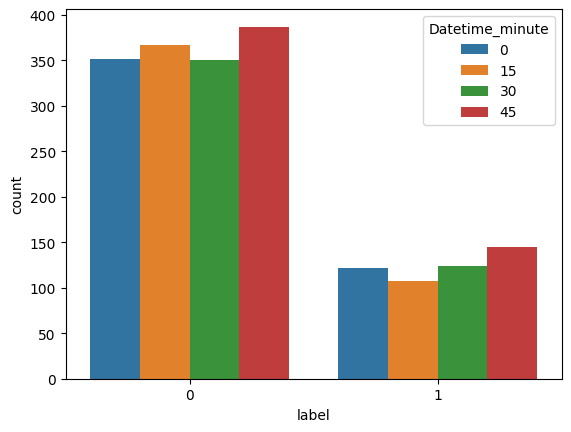

In [82]:
import seaborn as sns
sns.countplot(data=df,x='label',hue='Datetime_minute')

<Axes: xlabel='Datetime_minute', ylabel='count'>

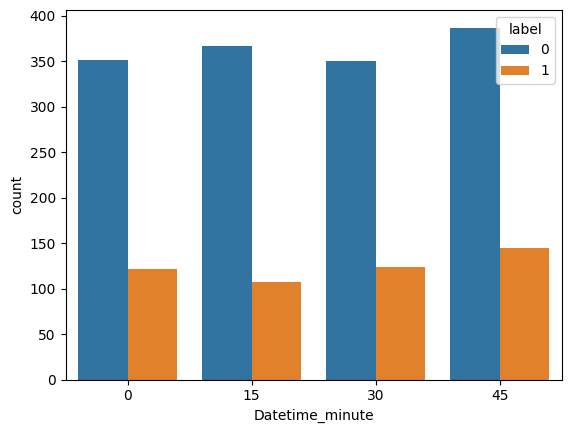

In [83]:
sns.countplot(data=df,x='Datetime_minute',hue='label')

<Axes: xlabel='Datetime_hour', ylabel='count'>

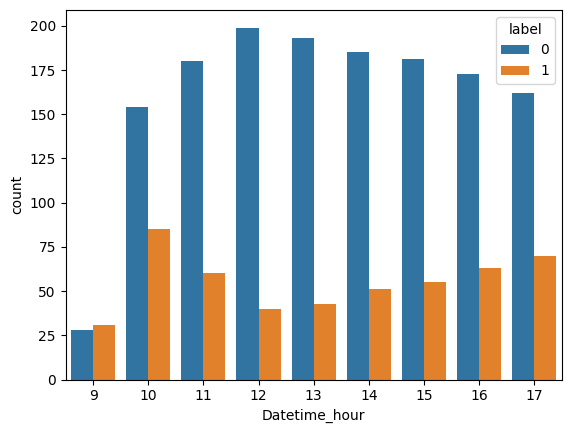

In [84]:
sns.countplot(data=df,x='Datetime_hour',hue='label')

<Axes: xlabel='Datetime_day_of_week', ylabel='count'>

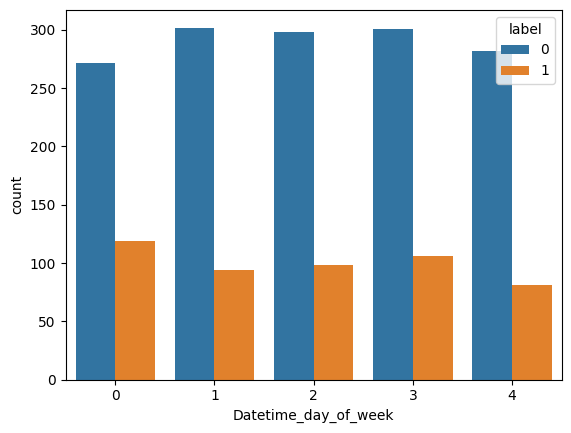

In [85]:
sns.countplot(data=df,x='Datetime_day_of_week',hue='label')